# 경사하강법

- 손실을 줄이는 알고리즘
- 기울기가 최소가 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
- 손실함수를 최적화하는 방법 중 하나
- 대표적인 알고리즘: 확률적 경사하강법, Deep Learning 필수

**점진적 학습(온라인 함수)**
- 머신러닝 모델을 학습하는 방법
- 머신러닝으로 학습할 데이터가 한번에 만들어지지 않을 떄, 지속적으로 새로운 데이터가 생성
- 에포크(epoch): 훈련 세트를 한 번 모두 사용하는 과정
- 미니배치 경사 하강법: 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
- 배치 사이즈: 한번에 학습되는 데이터의 양
- 확률적 경사하강법: 1개씩 꺼내서 학습
- 미니배치 경사하강법: 여러개씩 꺼내서 학습
- 배치 경사하강법: 몽땅 꺼내서 학습

**손실함수(loss function)**
- 실제값과 예측값의 차이
- 비용함수(Cost function)

# Module loading

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.5 MB/s eta 0:00:00


# Logistic Regression: 이진분류, 딥러닝의 기초
- 확률적인 계산을 통해 분류
- 회귀방정식을 통해: z => sigmoid(시그모이드): 0, 1
- predict_proba: 예측확률\
  white  red    predict\
  0.1    0.9  => red

**로지스틱 손실함수**(이진 크로스엔트로피)
- 양성클래스(1): 내가 찾아내려는 클래스
  - 손실값 = - (예측확률 * 클래스)
  - ex) 예측값이 0.9, 양성 클래스의 손실값은 -0.9
- 음성클래스(0)

# Dataset
- https://bit.ly/fish_csv_data

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [8]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

fish_target.shape, fish_input.shape

((159,), (159, 5))

# Preprocessing

In [9]:
# !반드시 훈련세트로 학습한 표준화를 이용하여 테스트세트를 표준화한다.
## 즉 훈련셋과 테스트셋으로 분리 후에 스케일링해야함
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)  # 분리된 input으로 스케일링하기
test_scaled = ss.fit_transform(test_input)

# SGDClassifier
- 확률적 경사하강법을 제공하는 분류용 클래스
- 확률적 경사하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
- loss: 손실 함수의 종류를 지정하는 매개변수
  - 이진분류회귀: 이진크로스엔트로피
  - 다중분류회귀: 크로스엔트로피
  - 딥러닝: 소프트맥스
- max_iter: 반복할 에포크 횟수

In [13]:
from sklearn.linear_model import SGDClassifier
# log - 로지스틱 손실함수
# max_iter=10 - 훈련세트를 10번 반복한다.
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.725


In [14]:
# 병렬학습
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## parial_fit()를 사용해서 최적의 에포크 횟수 찾는 작업

- 확률적 경사하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
- 에포크 횟수가 적으면 모델이 훈련세트에 덜 학습을 진행하는 것이다.

In [24]:
sc = SGDClassifier(loss = 'log_loss', random_state=42)

# partial_fit()만 사용하려면 훈련세트의 전체 클래스의 레이블이 전달
classes = np.unique(train_target)

In [25]:
# 0~300번의 에포크 동안 훈련을 반복하여 진행
train_score = []
test_score = []

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

In [18]:
print(sc.max_iter) # default = 1000

1000


# 에포크 횟수에 따른 정확도 시각화

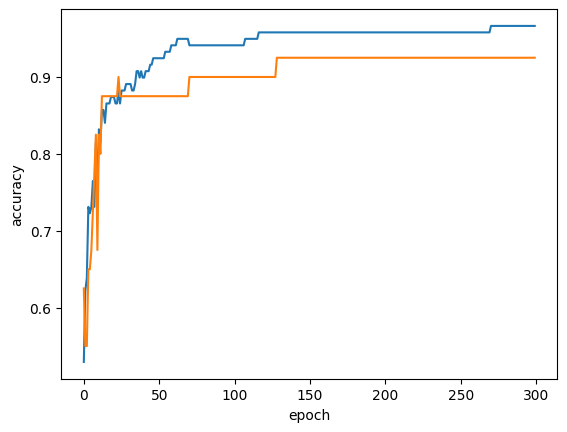

In [26]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [28]:
# tol: 향상된 최소값을 지정하는 매개변수, None 값은 횟수만큼 반복
sc = SGDClassifier(loss = 'log_loss', max_iter=100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.9
